In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#importing source file
data = pd.ExcelFile('https://github.com/adelnehme/python-for-excel-users-webinar/blob/master/sales_data_dirty.xlsx?raw=true')

In [9]:
#checking sheets inside
data.sheet_names

['sales', 'customers', 'dates', 'employees']

In [10]:
#parsing each sheet to a corresponding data frame
sales = data.parse('sales')
customers = data.parse('customers')
dates = data.parse('dates')
employees = data.parse('employees')

In [11]:
sales.head(3)

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,Status
0,43659,23153.2339,12,0,5
1,43660,1457.3288,2,0,5
2,43661,36865.8012,15,0,5


In [12]:
#droping Status column as it is 5 for all sales
sales.drop('Status', axis = 1, inplace = True)

In [13]:
#renaming values
sales['OnlineOrderFlag'] = sales['OnlineOrderFlag'].replace({0 : 'offline', 1 : 'online'})

In [14]:
dates.head(2)

,SalesOrderID,OrderDate,ShipDate
0,43659,2011-05-31 00:00:00,2011-06-07 00:00:00
1,43660,2011-05-31 00:00:00,2011-06-07 00:00:00


In [15]:
#converting datetimes to a more convenient format
dates['OrderDate'] = pd.to_datetime(dates['OrderDate'], format = '%Y-%m-%d')
dates['ShipDate'] = pd.to_datetime(dates['ShipDate'], format = '%Y-%m-%d')

In [16]:
#filling in missing information
customers.loc[customers['EmployeeFirstName'].isnull(), 'ChannelType'] = 'B2C'
customers.loc[customers['CustomerFirstName'].isnull(), 'ChannelType'] = 'B2B'

In [17]:
#adding a new column to a DataFrame
customers['FullName'] = customers['EmployeeFirstName'] + ' ' + customers['EmployeeLastName']
customers.head(2)

,SalesOrderID,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,FullName
0,43659,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter
1,43660,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter


In [18]:
employees['FullName'] = employees['FirstName'] + ' ' + employees['LastName']
employees.head(2)

,FirstName,LastName,CountryCode,RegionName,CommissionPct,FullName
0,Amy,Alberts,GB,United Kingdom,0.000,Amy Alberts
1,David,Campbell,US,Northwest,0.012,David Campbell


In [19]:
#Data merge
sales_dates = sales.merge(dates, on = 'SalesOrderID', how = 'left')

In [20]:
#Extracting year from a OrderDate column
sales_dates['Order_Year'] = sales_dates['OrderDate'].dt.year
sales_dates.head(2)

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate,Order_Year
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07,2011
1,43660,1457.3288,2,offline,2011-05-31,2011-06-07,2011


In [22]:
sales_dates_customers = sales_dates.merge(customers, on = 'SalesOrderID', how = 'left')
sales_dates_customers.head(1)

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate,Order_Year,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,FullName
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07,2011,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter


In [23]:
full_data = sales_dates_customers.merge(employees, on = 'FullName', how = 'left')
full_data.head(1)

,SalesOrderID,TotalDue,NumberofItems,OnlineOrderFlag,OrderDate,ShipDate,Order_Year,CustomerFirstName,CustomerLastName,EmployeeFirstName,EmployeeLastName,ChannelType,FullName,FirstName,LastName,CountryCode,RegionName,CommissionPct
0,43659,23153.2339,12,offline,2011-05-31,2011-06-07,2011,NaN,NaN,Tsvi,Reiter,B2B,Tsvi Reiter,Tsvi,Reiter,US,Southeast,0.01


In [24]:
#drpoing irrelevant columns
full_data.drop(['OnlineOrderFlag', 'CustomerFirstName', 'CustomerLastName', 'EmployeeFirstName', 'EmployeeLastName', 'FirstName', 'LastName' ], axis = 1, inplace = True)
full_data.head(1)

,SalesOrderID,TotalDue,NumberofItems,OrderDate,ShipDate,Order_Year,ChannelType,FullName,CountryCode,RegionName,CommissionPct
0,43659,23153.2339,12,2011-05-31,2011-06-07,2011,B2B,Tsvi Reiter,US,Southeast,0.01


In [25]:
#adding a new column with calculated compensation
full_data['Compensation'] = full_data['TotalDue'] * (full_data['CommissionPct'] / 100)
full_data.head(1)

,SalesOrderID,TotalDue,NumberofItems,OrderDate,ShipDate,Order_Year,ChannelType,FullName,CountryCode,RegionName,CommissionPct,Compensation
0,43659,23153.2339,12,2011-05-31,2011-06-07,2011,B2B,Tsvi Reiter,US,Southeast,0.01,2.315323


In [27]:
employees_compensation = full_data.groupby(['Order_Year','FullName']).sum().reset_index()
employees_compensation.head(2)

,Order_Year,FullName,SalesOrderID,TotalDue,NumberofItems,CommissionPct,Compensation
0,2011,David Campbell,1242002,675663.6940,220,0.336,81.079643
1,2011,Garrett Vargas,1329262,563326.5478,284,0.300,56.332655


In [31]:
#Data aggregation
employees_compensation.sort_values(['Order_Year', 'Compensation'], ascending = True, inplace = True)
employees_compensation.head(3)

,Order_Year,FullName,SalesOrderID,TotalDue,NumberofItems,CommissionPct,Compensation
8,2011,Stephen Jiang,176971,32567.9155,17,0.00,0.000000
1,2011,Garrett Vargas,1329262,563326.5478,284,0.30,56.332655
6,2011,Pamela Ansman-Wolfe,974811,730273.4889,273,0.22,73.027349


In [32]:
#exclude all info that is not from 2012
highest_earner_2012 = employees_compensation[employees_compensation['Order_Year'] == 2012]
highest_earner_2012.head(2)

,Order_Year,FullName,SalesOrderID,TotalDue,NumberofItems,CommissionPct,Compensation
10,2012,Amy Alberts,335313,130667.0249,103,0.0,0.0
21,2012,Stephen Jiang,1036258,516197.3680,290,0.0,0.0


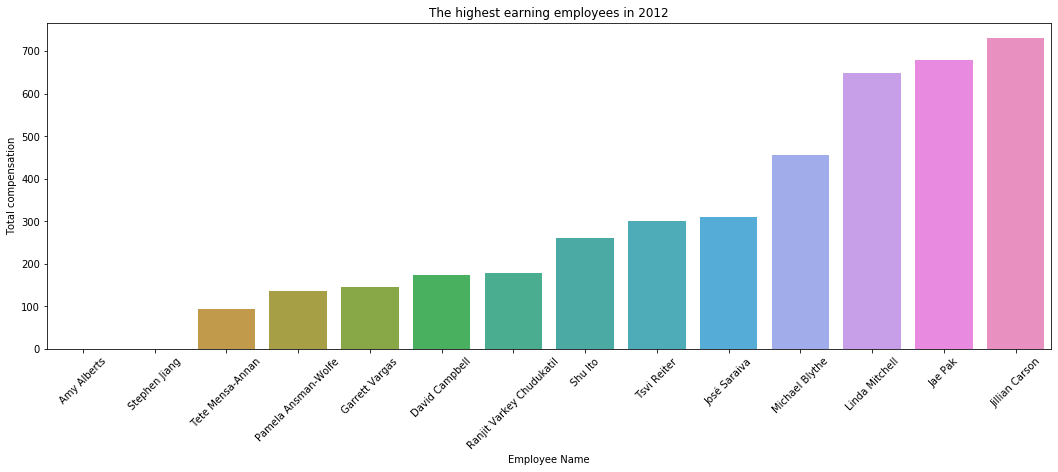

In [35]:
#visualization
plt.figure(figsize = (18, 6))
sns.barplot(x = 'FullName', y = 'Compensation', data = highest_earner_2012)
plt.xlabel('Employee Name')
plt.xticks(rotation = 45)
plt.ylabel('Total compensation')
plt.title('The highest earning employees in 2012')
plt.show()